In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Datasets
# File paths (based on extracted zip structure)
product_excel_path = 'DataSetFolder/Amazon product/P1-AmazingMartEU2.xlsx'
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21.csv'
product_folder_path = 'DataSetFolder/Amazon Products Dataset'  # Path for the folder

# Load the Excel and CSV files
product_excel_df = pd.read_excel(product_excel_path)
product_csv_df = pd.read_csv(product_csv_path)

# Load CSV files from 'Amazon Products Dataset' folder
import os
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]

# Combine all datasets into one DataFrame
combined_df = pd.concat([product_excel_df, product_csv_df] + product_folder_dfs, ignore_index=True)

# Step 3: Basic Data Exploration
print(combined_df.shape)  # Number of rows and columns
print(combined_df.head())  # First few rows of the dataset
print(combined_df.info())  # Info about the dataset

# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])  # Columns with missing values

# Step 4: Clean Price Column (if applicable)
def clean_price_column(column):
    return pd.to_numeric(column.str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Apply cleaning function to the 'actual_price' and 'discount_price' columns (if applicable)
# combined_df['actual_price'] = clean_price_column(combined_df['actual_price'])
# combined_df['discount_price'] = clean_price_column(combined_df['discount_price'])

# Step 5: Data Reduction (drop unnecessary columns)
columns_to_drop = ['order_id', 'customer_name', 'region', 'city']  # Example of columns to drop
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Step 6: Univariate Analysis - Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['actual_price'], bins=30, kde=True)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count of Orders per Segment
plt.figure(figsize=(12, 8))
sns.countplot(y='Segment', data=combined_df_cleaned, order=combined_df_cleaned['Segment'].value_counts().index)
plt.title('Count of Orders per Segment')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.show()

# Step 8: Outlier Detection for Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df_cleaned['actual_price'])
plt.title('Boxplot of Actual Prices')
plt.show()

# Step 9: Average Price per Region
avg_price_per_region = combined_df_cleaned.groupby('Region')['actual_price'].mean().sort_values()
avg_price_per_region.plot(kind='barh', figsize=(12, 8))
plt.title('Average Price per Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

# Step 10: Actual Price vs. Shipping Mode Analysis (if available)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discount_price', data=combined_df_cleaned)
plt.title('Actual Price vs. Discount Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.show()

# Step 11: Correlation Heatmap
numeric_cols = combined_df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 12: Value Counts for Categorical Variables (e.g., Segment or Region)
print(combined_df_cleaned['Segment'].value_counts())

# Step 13: Ratings Distribution (if applicable)
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['ratings'].dropna(), bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


PermissionError: [Errno 13] Permission denied: 'DataSetFolder/Amazon Sales FY2020-21.csv'

In [11]:
product_folder_path = 'DataSetFolder/Amazon Products Dataset'
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]
print(product_folder_dfs[0].head())  # Check first CSV file


   id                     category_name
0   1          Beading & Jewelry Making
1   2                 Fabric Decorating
2   3       Knitting & Crochet Supplies
3   4              Printmaking Supplies
4   5  Scrapbooking & Stamping Supplies


In [13]:
import pandas as pd

product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21.csv'

try:
    product_csv_df = pd.read_csv(product_csv_path)
    print(product_csv_df.head())  # Check the first few rows
except Exception as e:
    print(f"Error loading Amazon Sales FY2020-21.csv: {e}")


Error loading Amazon Sales FY2020-21.csv: [Errno 13] Permission denied: 'DataSetFolder/Amazon Sales FY2020-21.csv'


In [15]:
import pandas as pd

# Updated file path based on the new folder name
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21/Amazon Sales FY2020-21.csv'

# Try loading the CSV file
try:
    product_csv_df = pd.read_csv(product_csv_path)
    print(product_csv_df.head())  # Display the first few rows of the file
except Exception as e:
    print(f"Error loading Amazon Sales FY2020-21.csv: {e}")


C:\Users\user\AppData\Local\Temp\ipykernel_11148\1566198363.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  product_csv_df = pd.read_csv(product_csv_path)


    order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region U

(1717094, 54)
          Order ID Order Date     Customer Name        City         Country  \
0  BN-2011-7407039 2011-01-01        Ruby Patel   Stockholm          Sweden   
1  AZ-2011-9050313 2011-01-03    Summer Hayward   Southport  United Kingdom   
2  AZ-2011-6674300 2011-01-04  Devin Huddleston     Valence          France   
3  BN-2011-2819714 2011-01-04       Mary Parker  Birmingham  United Kingdom   
4   AZ-2011-617423 2011-01-05      Daniel Burke  Echirolles          France   

    Region      Segment  Ship Date     Ship Mode                 State  ...  \
0    North  Home Office 2011-01-05  Economy Plus             Stockholm  ...   
1    North     Consumer 2011-01-07       Economy               England  ...   
2  Central     Consumer 2011-01-08       Economy  Auvergne-Rhône-Alpes  ...   
3    North    Corporate 2011-01-09       Economy               England  ...   
4  Central  Home Office 2011-01-07      Priority  Auvergne-Rhône-Alpes  ...   

  asin title imgUrl  productURL star

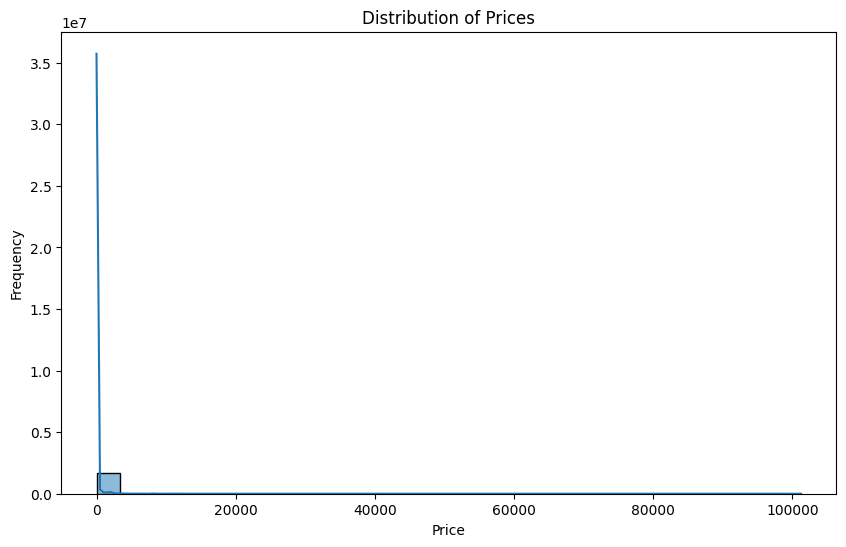

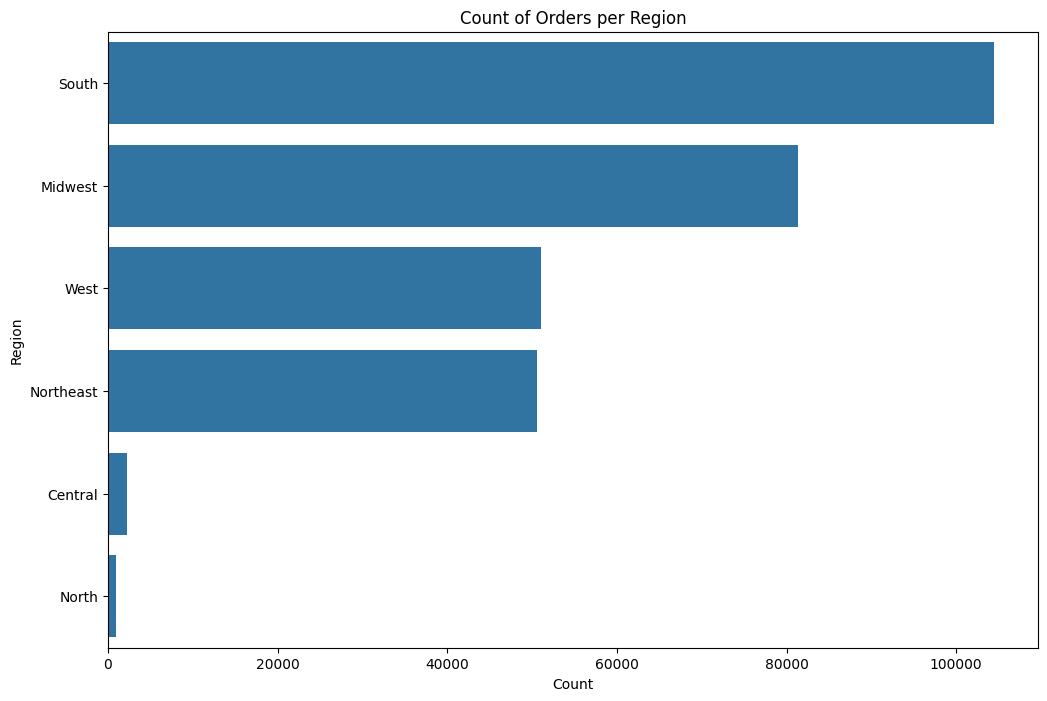

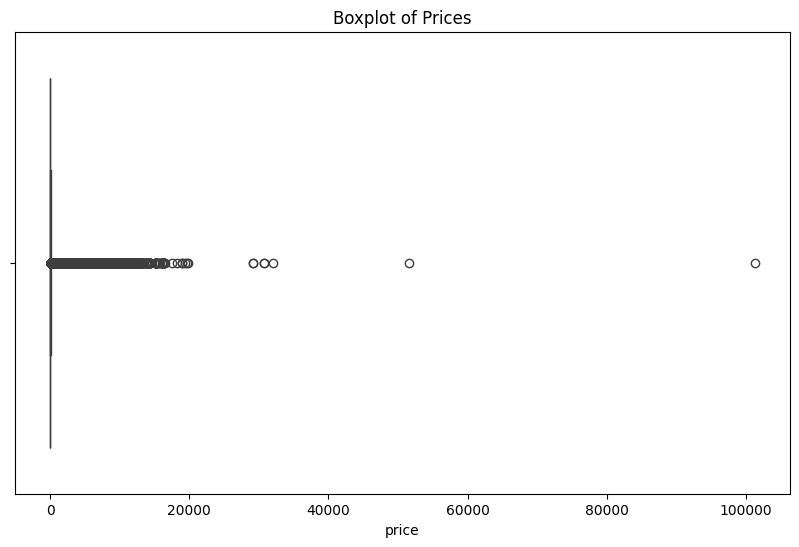

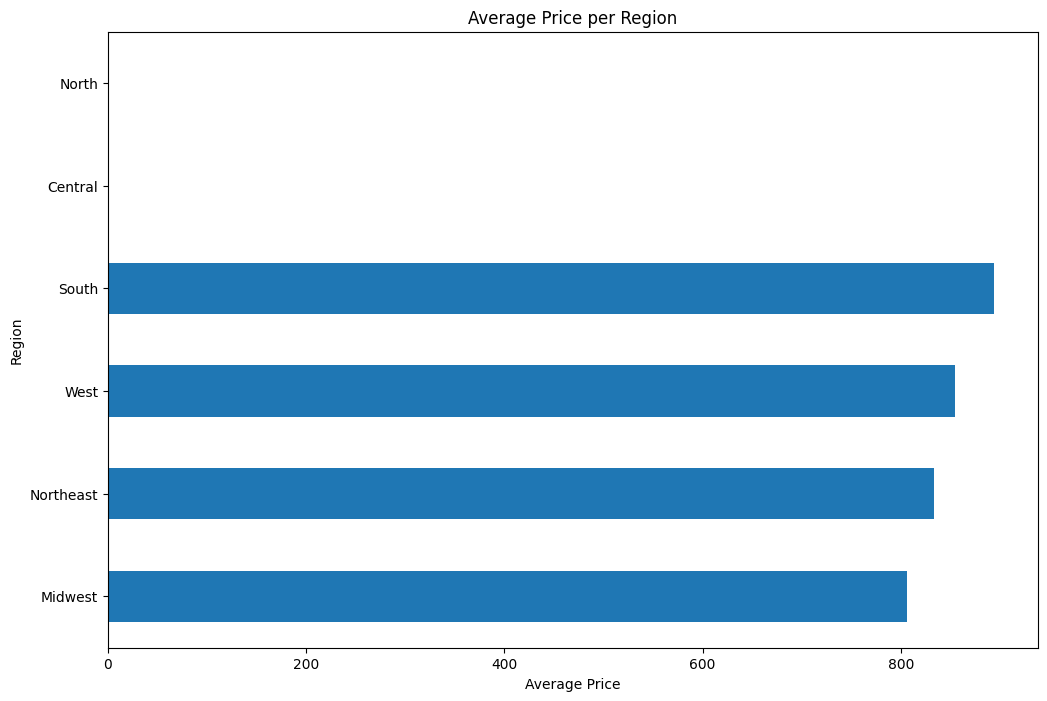

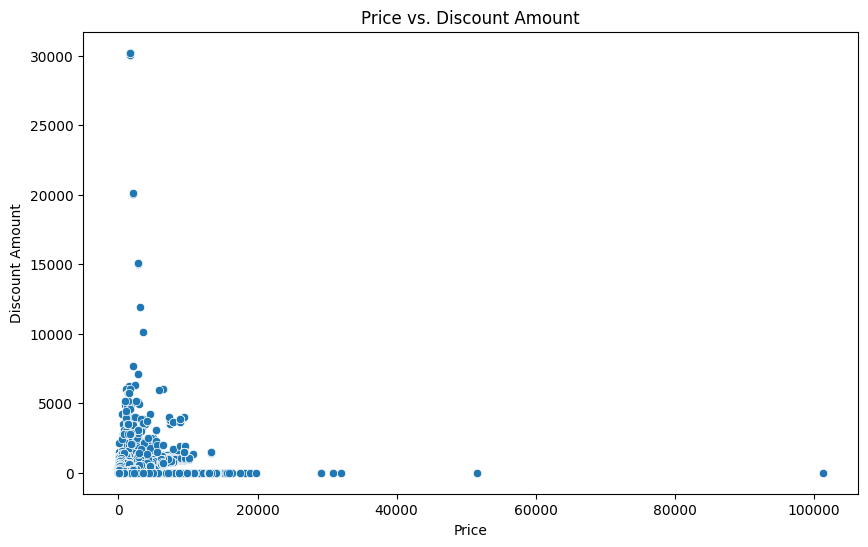

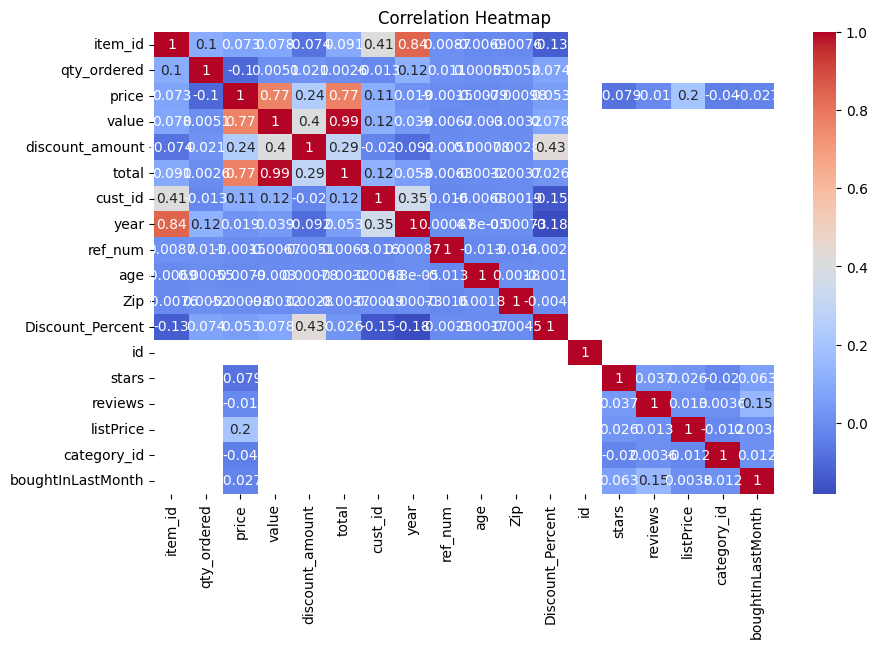

Region
South        104415
Midwest       81299
West          51080
Northeast     50531
Central        2234
North           950
Name: count, dtype: int64


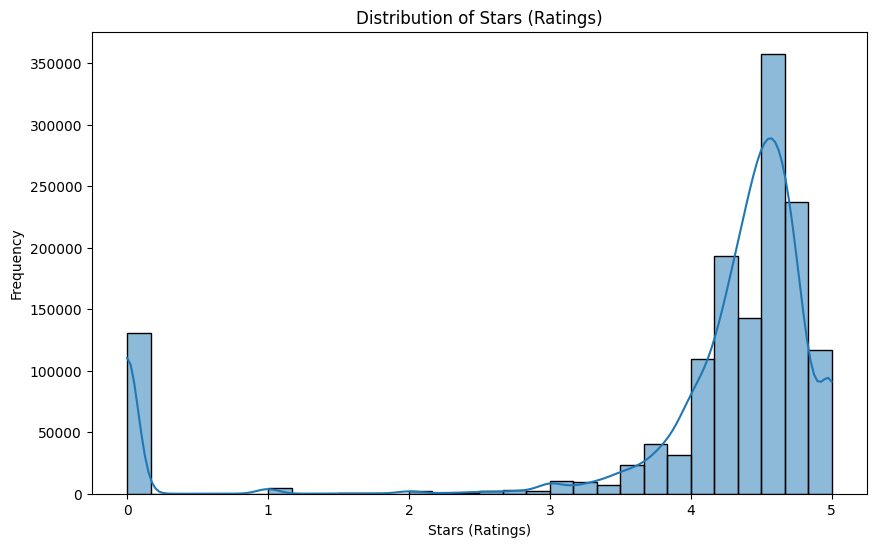

In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Datasets
# File paths (based on extracted zip structure)
product_excel_path = 'DataSetFolder/Amazon product/P1-AmazingMartEU2.xlsx'
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21/Amazon Sales FY2020-21.csv'
product_folder_path = 'DataSetFolder/Amazon Products Dataset'  # Path for the folder

# Load the Excel and CSV files
product_excel_df = pd.read_excel(product_excel_path)
product_csv_df = pd.read_csv(product_csv_path, low_memory=False)

# Load CSV files from 'Amazon Products Dataset' folder
import os
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]

# Combine all datasets into one DataFrame
combined_df = pd.concat([product_excel_df, product_csv_df] + product_folder_dfs, ignore_index=True)

# Step 3: Basic Data Exploration
print(combined_df.shape)  # Number of rows and columns
print(combined_df.head())  # First few rows of the dataset
print(combined_df.info())  # Info about the dataset

# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])  # Columns with missing values

# Step 4: Clean Price Column (if applicable)
# Assuming there's a column for 'price' and 'discount' in the datasets
def clean_price_column(column):
    return pd.to_numeric(column.str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Apply cleaning function to the 'price' and 'discount_amount' columns if they exist
# Uncomment if applicable
# combined_df['price'] = clean_price_column(combined_df['price'])
# combined_df['discount_amount'] = clean_price_column(combined_df['discount_amount'])

# Step 5: Data Reduction (drop unnecessary columns)
# Based on common columns seen in the dataset, adjust the columns_to_drop list as needed
columns_to_drop = ['order_id', 'user_name', 'Phone No.', 'Sign in date']  # Example of columns to drop
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Step 6: Univariate Analysis - Distribution of Prices
# Assuming 'price' column exists, adjust if needed
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count of Orders per Region or Category
# Replace 'Region' and 'category_name' with the actual column names
plt.figure(figsize=(12, 8))
sns.countplot(y='Region', data=combined_df_cleaned, order=combined_df_cleaned['Region'].value_counts().index)
plt.title('Count of Orders per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Step 8: Outlier Detection for Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()

# Step 9: Average Price per Category or Region
# Group by 'Region' or 'category_name' depending on the columns in the dataset
avg_price_per_region = combined_df_cleaned.groupby('Region')['price'].mean().sort_values()
avg_price_per_region.plot(kind='barh', figsize=(12, 8))
plt.title('Average Price per Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

# Step 10: Price vs. Discount Analysis
# Assuming there's a 'discount_amount' column in the dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='discount_amount', data=combined_df_cleaned)
plt.title('Price vs. Discount Amount')
plt.xlabel('Price')
plt.ylabel('Discount Amount')
plt.show()

# Step 11: Correlation Heatmap
numeric_cols = combined_df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 12: Value Counts for Categorical Variables (e.g., Segment or Region)
# Replace 'Segment' with the actual column name from the dataset
print(combined_df_cleaned['Region'].value_counts())

# Step 13: Stars Distribution (Using 'stars' from 'Amazon Products Dataset' CSV file)
# If the 'stars' column is only in one CSV file (file 2), you need to access that specific DataFrame
stars_df = product_folder_dfs[1]  # Assuming 'stars' column is in the second CSV

plt.figure(figsize=(10, 6))
sns.histplot(stars_df['stars'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars (Ratings)')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Frequency')
plt.show()


(1717094, 54)
          Order ID Order Date     Customer Name        City         Country  \
0  BN-2011-7407039 2011-01-01        Ruby Patel   Stockholm          Sweden   
1  AZ-2011-9050313 2011-01-03    Summer Hayward   Southport  United Kingdom   
2  AZ-2011-6674300 2011-01-04  Devin Huddleston     Valence          France   
3  BN-2011-2819714 2011-01-04       Mary Parker  Birmingham  United Kingdom   
4   AZ-2011-617423 2011-01-05      Daniel Burke  Echirolles          France   

    Region      Segment  Ship Date     Ship Mode                 State  ...  \
0    North  Home Office 2011-01-05  Economy Plus             Stockholm  ...   
1    North     Consumer 2011-01-07       Economy               England  ...   
2  Central     Consumer 2011-01-08       Economy  Auvergne-Rhône-Alpes  ...   
3    North    Corporate 2011-01-09       Economy               England  ...   
4  Central  Home Office 2011-01-07      Priority  Auvergne-Rhône-Alpes  ...   

  asin title imgUrl  productURL star

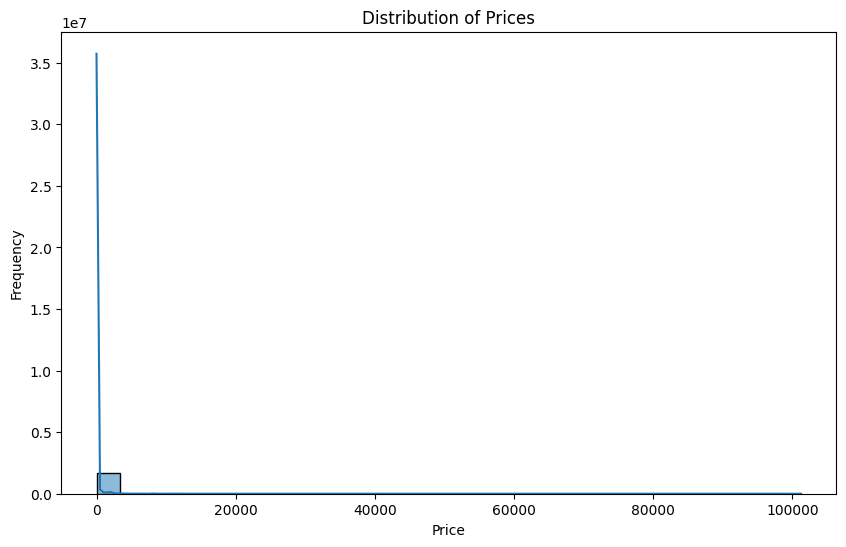

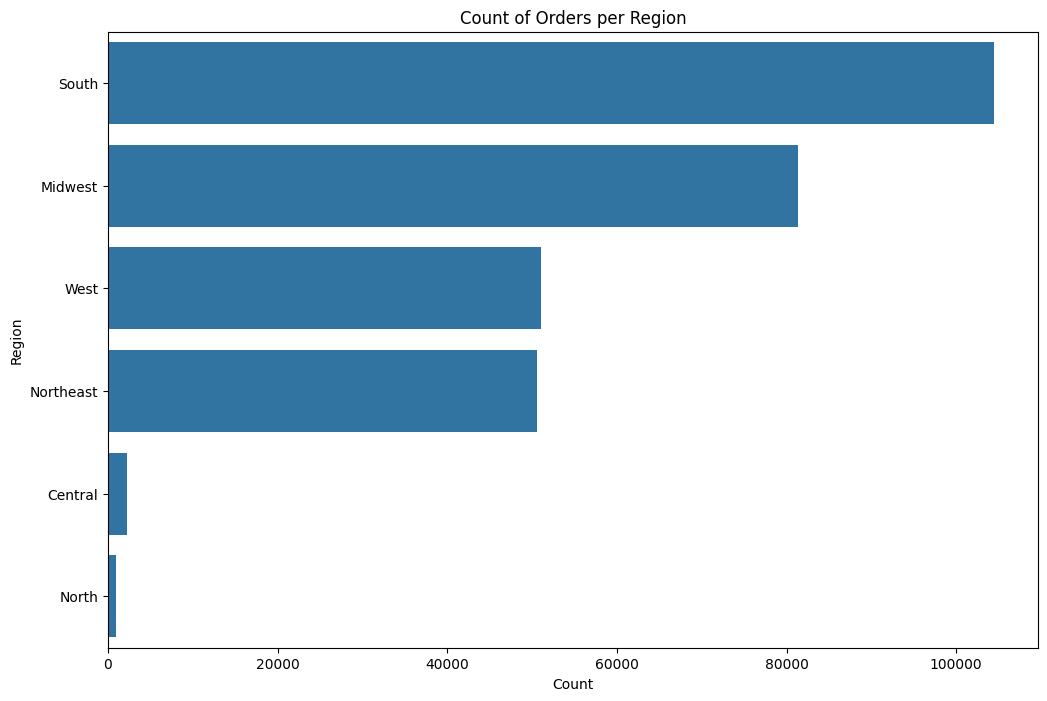

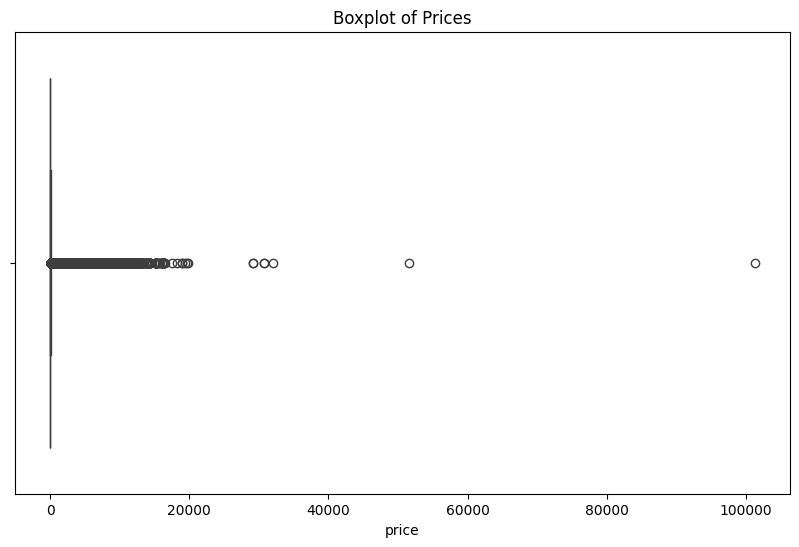

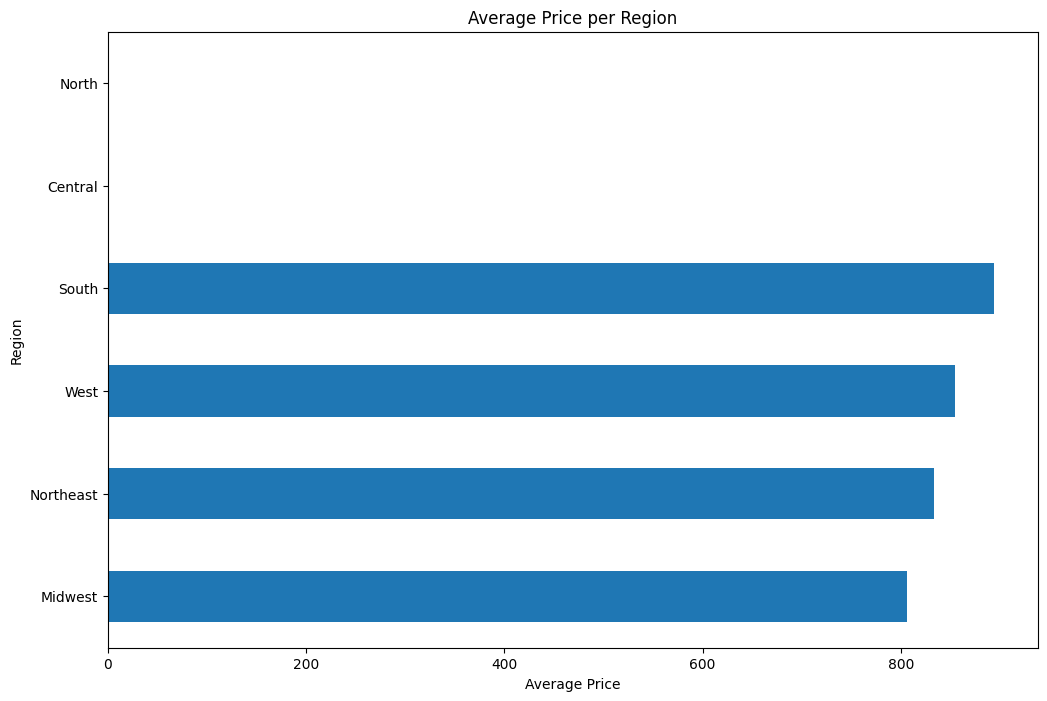

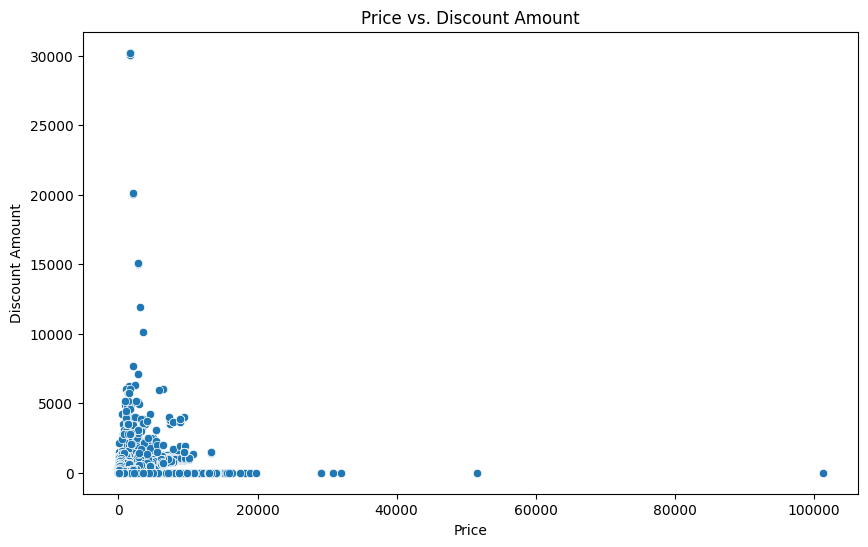

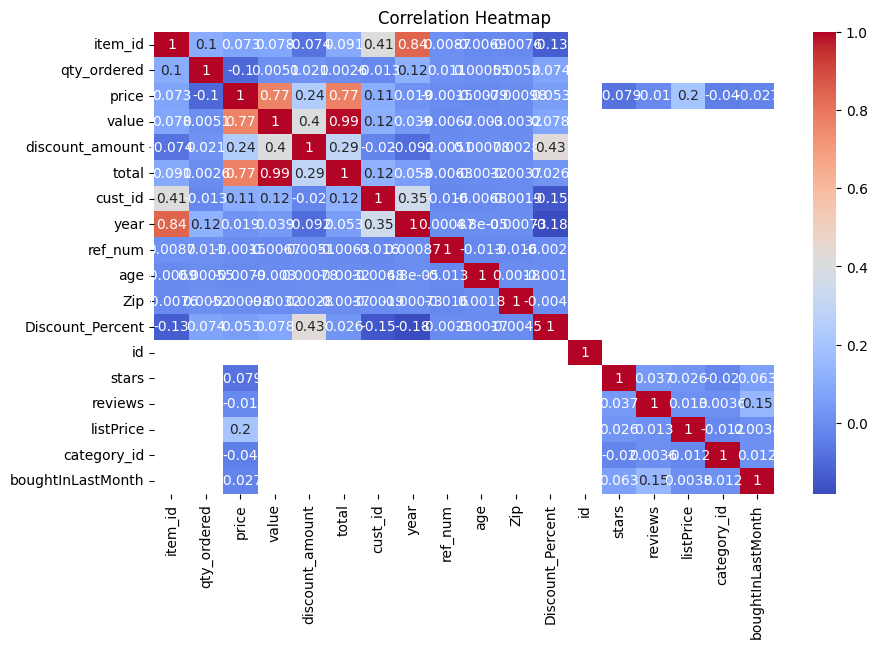

Region
South        104415
Midwest       81299
West          51080
Northeast     50531
Central        2234
North           950
Name: count, dtype: int64


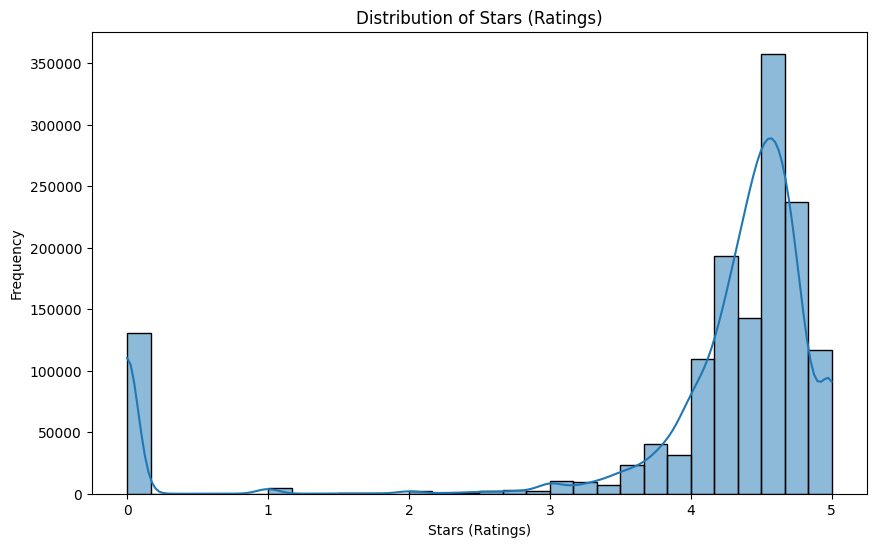

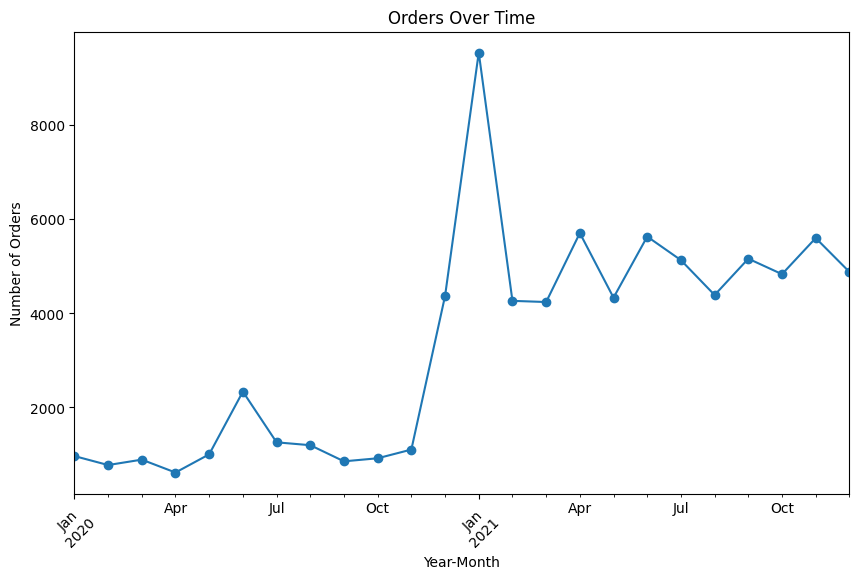

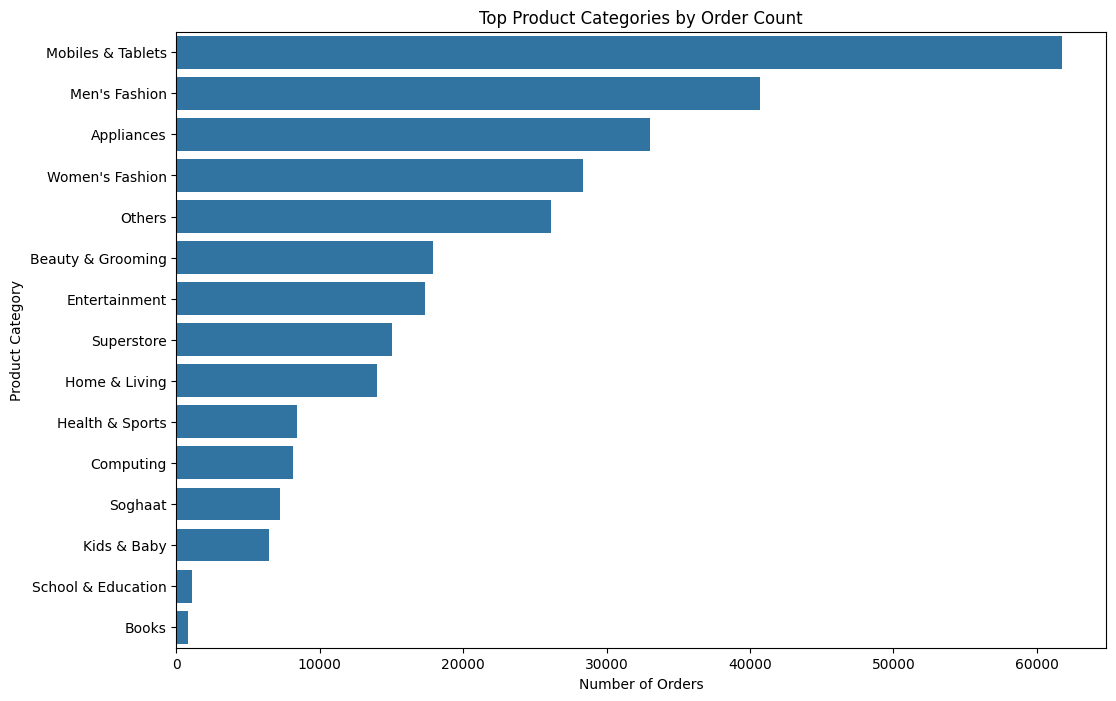

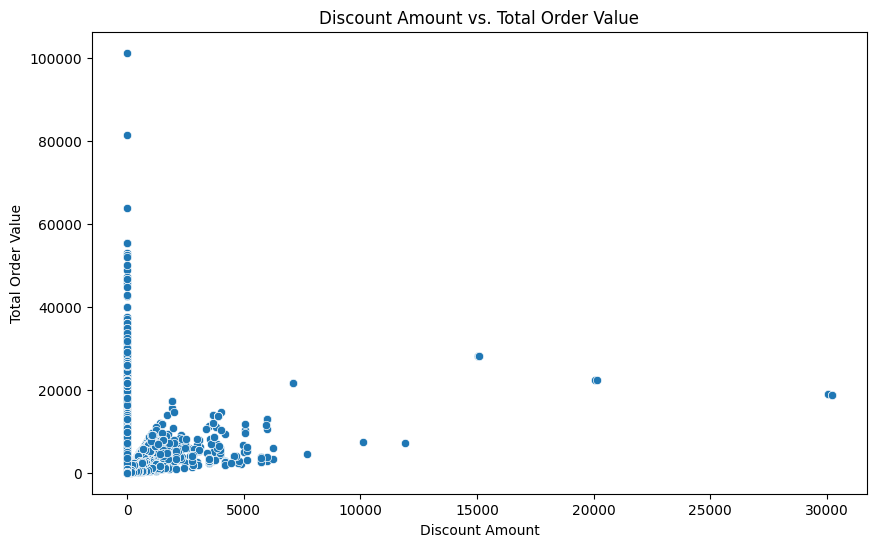

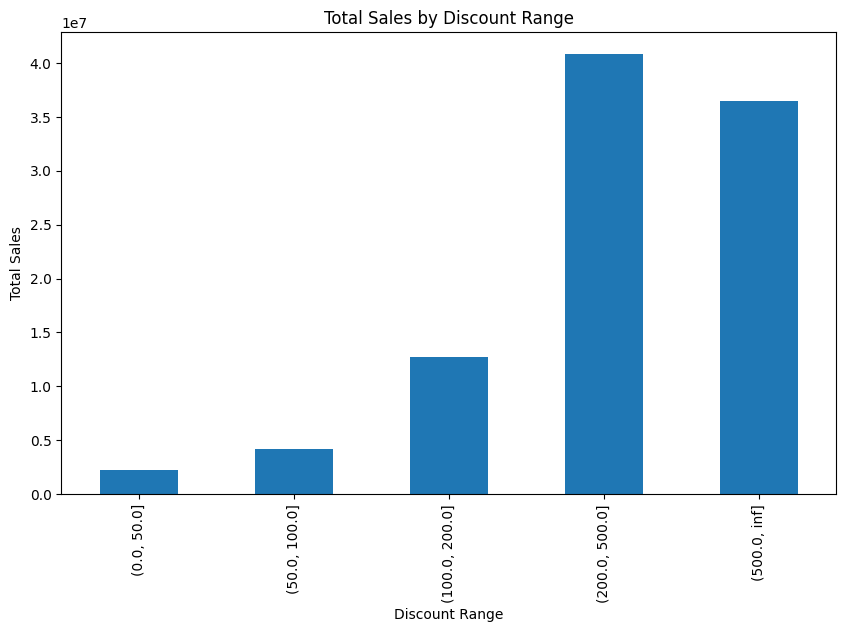

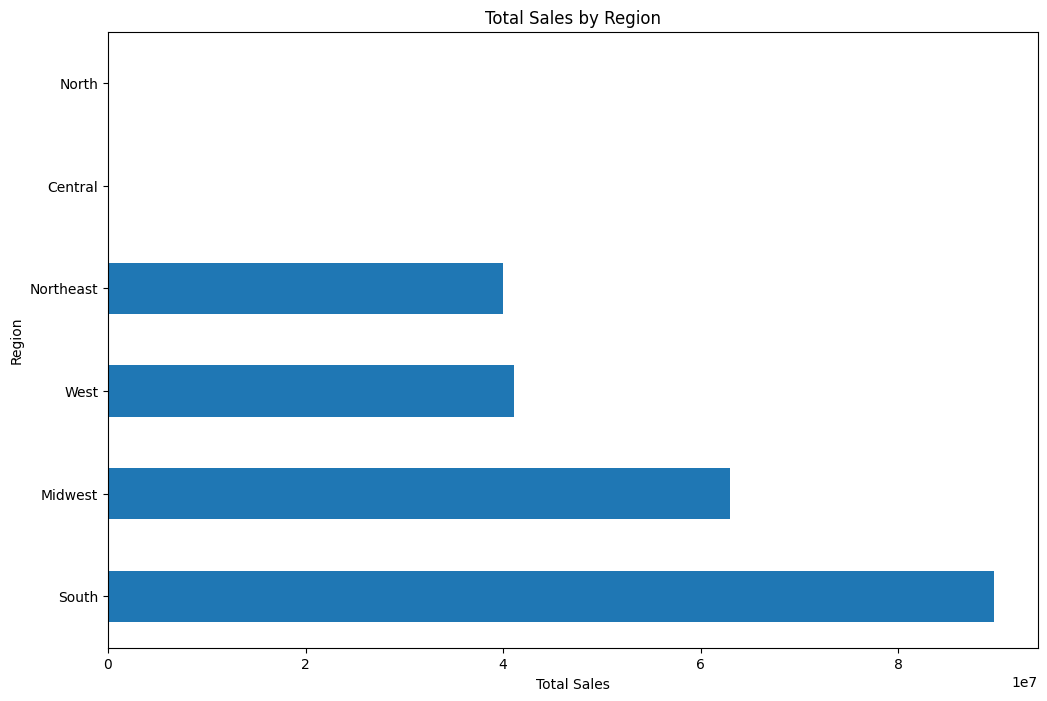

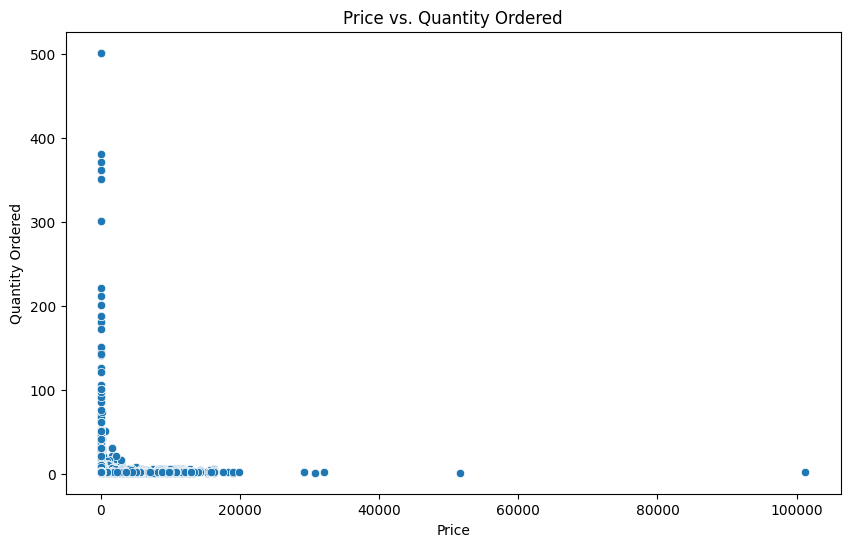

Correlation between Price and Quantity Ordered:
                 price  qty_ordered
price        1.000000    -0.103748
qty_ordered -0.103748     1.000000


In [27]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Datasets
# File paths (based on extracted zip structure)
product_excel_path = 'DataSetFolder/Amazon product/P1-AmazingMartEU2.xlsx'
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21/Amazon Sales FY2020-21.csv'
product_folder_path = 'DataSetFolder/Amazon Products Dataset'  # Path for the folder

# Load the Excel and CSV files
product_excel_df = pd.read_excel(product_excel_path)
product_csv_df = pd.read_csv(product_csv_path, low_memory=False)

# Load CSV files from 'Amazon Products Dataset' folder
import os
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]

# Combine all datasets into one DataFrame
combined_df = pd.concat([product_excel_df, product_csv_df] + product_folder_dfs, ignore_index=True)

# Step 3: Basic Data Exploration
print(combined_df.shape)  # Number of rows and columns
print(combined_df.head())  # First few rows of the dataset
print(combined_df.info())  # Info about the dataset

# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])  # Columns with missing values

# Step 4: Clean Price Column (if applicable)
def clean_price_column(column):
    return pd.to_numeric(column.str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Apply cleaning function to the 'price' and 'discount_amount' columns if they exist
# Uncomment if applicable
# combined_df['price'] = clean_price_column(combined_df['price'])
# combined_df['discount_amount'] = clean_price_column(combined_df['discount_amount'])

# Step 5: Data Reduction (drop unnecessary columns)
# Based on common columns seen in the dataset, adjust the columns_to_drop list as needed
columns_to_drop = ['order_id', 'user_name', 'Phone No.', 'Sign in date']  # Example of columns to drop
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Step 6: Univariate Analysis - Distribution of Prices
# Assuming 'price' column exists, adjust if needed
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count of Orders per Region or Category
# Replace 'Region' and 'category_name' with the actual column names
plt.figure(figsize=(12, 8))
sns.countplot(y='Region', data=combined_df_cleaned, order=combined_df_cleaned['Region'].value_counts().index)
plt.title('Count of Orders per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Step 8: Outlier Detection for Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()

# Step 9: Average Price per Category or Region
# Group by 'Region' or 'category_name' depending on the columns in the dataset
avg_price_per_region = combined_df_cleaned.groupby('Region')['price'].mean().sort_values()
avg_price_per_region.plot(kind='barh', figsize=(12, 8))
plt.title('Average Price per Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

# Step 10: Price vs. Discount Analysis
# Assuming there's a 'discount_amount' column in the dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='discount_amount', data=combined_df_cleaned)
plt.title('Price vs. Discount Amount')
plt.xlabel('Price')
plt.ylabel('Discount Amount')
plt.show()

# Step 11: Correlation Heatmap
numeric_cols = combined_df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 12: Value Counts for Categorical Variables (e.g., Segment or Region)
print(combined_df_cleaned['Region'].value_counts())

# Step 13: Stars Distribution (Using 'stars' from 'Amazon Products Dataset' CSV file)
# Assuming the 'stars' column is in the second file (product_folder_dfs[1])
stars_df = product_folder_dfs[1]

plt.figure(figsize=(10, 6))
sns.histplot(stars_df['stars'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars (Ratings)')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Frequency')
plt.show()

# Additional EDA
# Time Series Analysis (Orders Over Time)
combined_df['order_date'] = pd.to_datetime(combined_df['order_date'], errors='coerce')
combined_df['year_month'] = combined_df['order_date'].dt.to_period('M')

monthly_orders = combined_df.groupby('year_month').size()
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Orders Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Top Categories by Order Count
category_order_count = combined_df['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_order_count.values, y=category_order_count.index)
plt.title('Top Product Categories by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

# Discount Impact Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_amount', y='total', data=combined_df)
plt.title('Discount Amount vs. Total Order Value')
plt.xlabel('Discount Amount')
plt.ylabel('Total Order Value')
plt.show()

# Discount Impact Analysis
discount_bins = pd.cut(combined_df['discount_amount'], bins=[0, 50, 100, 200, 500, np.inf])
discount_sales = combined_df.groupby(discount_bins, observed=False)['total'].sum()  # Fixing the warning

# Plot total sales by discount range
plt.figure(figsize=(10, 6))
discount_sales.plot(kind='bar')
plt.title('Total Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales')
plt.show()


# Customer Segmentation Analysis (Sales by Region)
region_sales = combined_df.groupby('Region')['total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
region_sales.plot(kind='barh')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# Correlation Between Price and Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='qty_ordered', data=combined_df)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.show()

price_qty_corr = combined_df[['price', 'qty_ordered']].corr()
print("Correlation between Price and Quantity Ordered:\n", price_qty_corr)


(1717094, 54)
          Order ID Order Date     Customer Name        City         Country  \
0  BN-2011-7407039 2011-01-01        Ruby Patel   Stockholm          Sweden   
1  AZ-2011-9050313 2011-01-03    Summer Hayward   Southport  United Kingdom   
2  AZ-2011-6674300 2011-01-04  Devin Huddleston     Valence          France   
3  BN-2011-2819714 2011-01-04       Mary Parker  Birmingham  United Kingdom   
4   AZ-2011-617423 2011-01-05      Daniel Burke  Echirolles          France   

    Region      Segment  Ship Date     Ship Mode                 State  ...  \
0    North  Home Office 2011-01-05  Economy Plus             Stockholm  ...   
1    North     Consumer 2011-01-07       Economy               England  ...   
2  Central     Consumer 2011-01-08       Economy  Auvergne-Rhône-Alpes  ...   
3    North    Corporate 2011-01-09       Economy               England  ...   
4  Central  Home Office 2011-01-07      Priority  Auvergne-Rhône-Alpes  ...   

  asin title imgUrl  productURL star

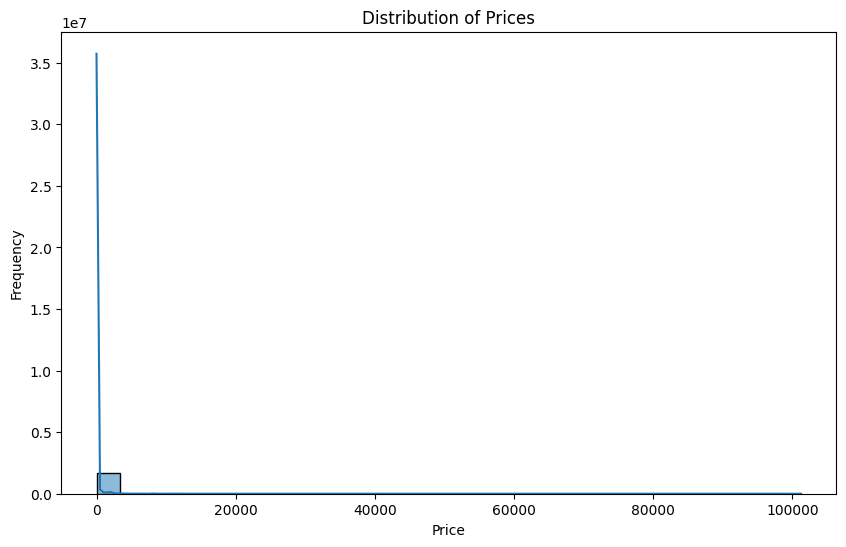

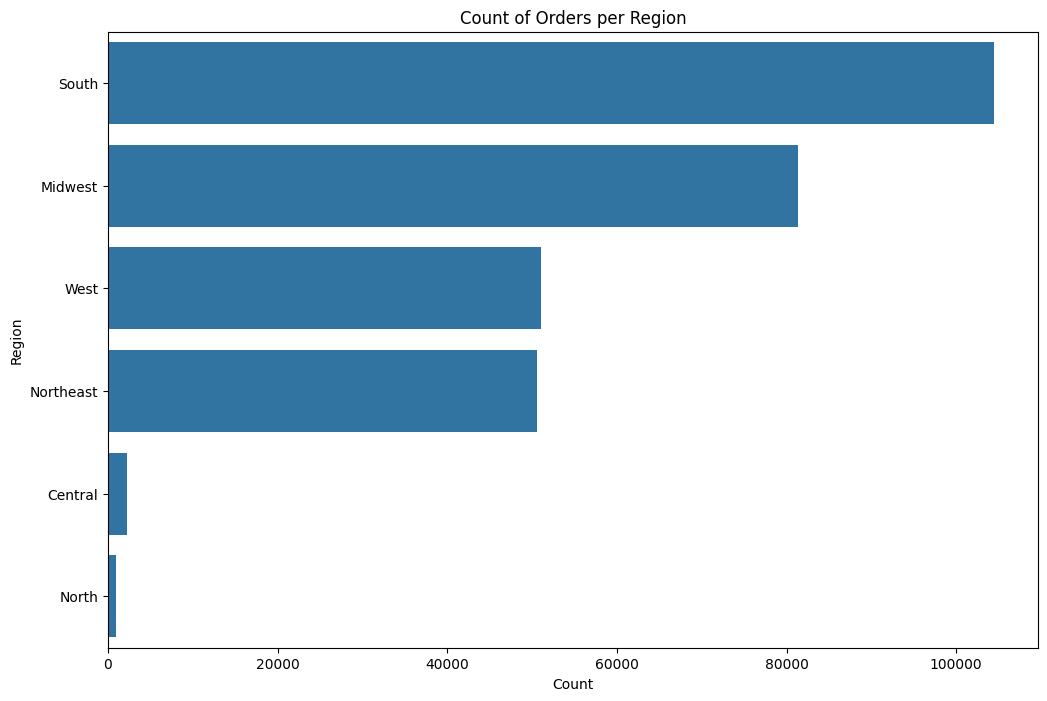

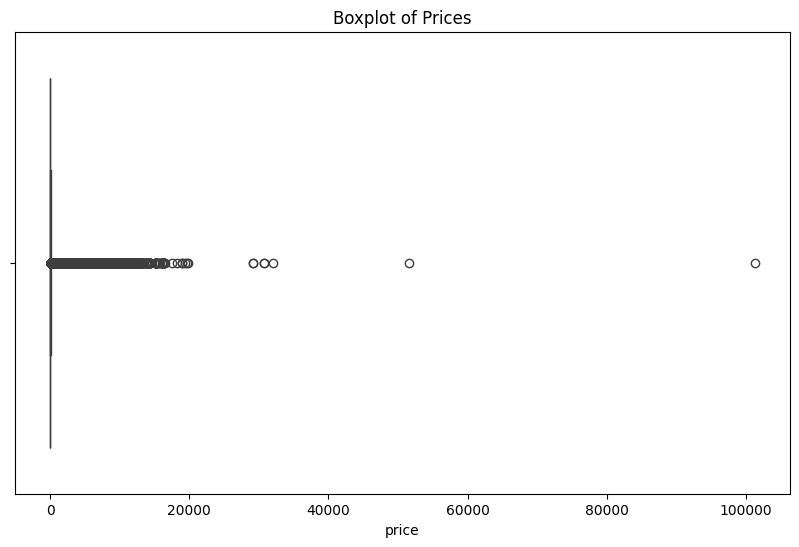

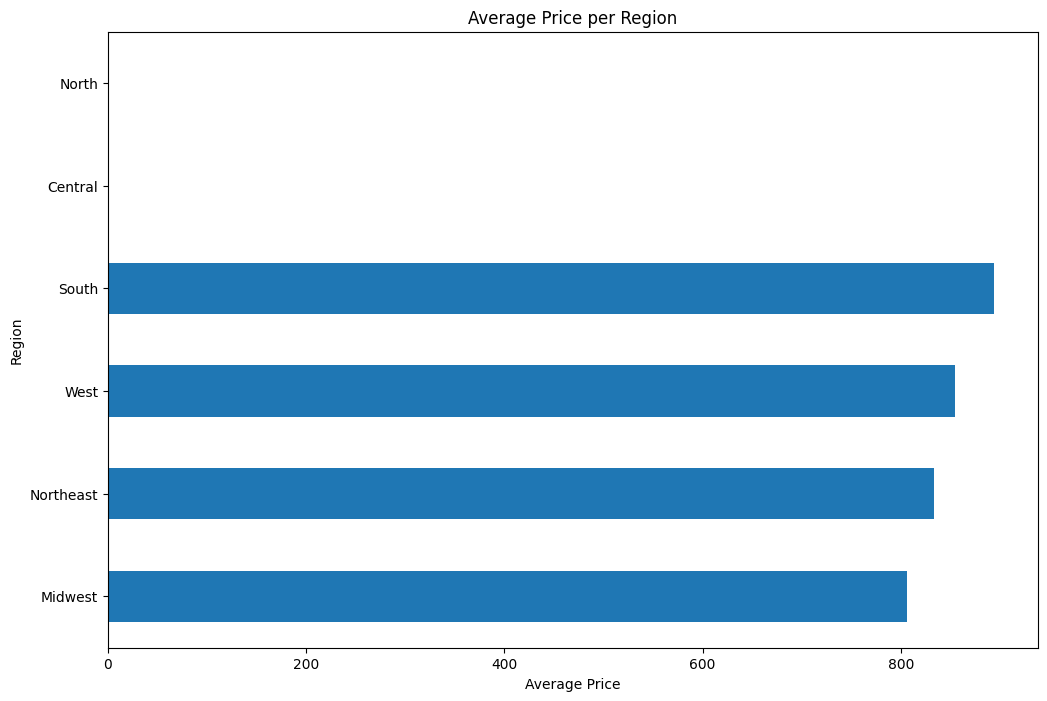

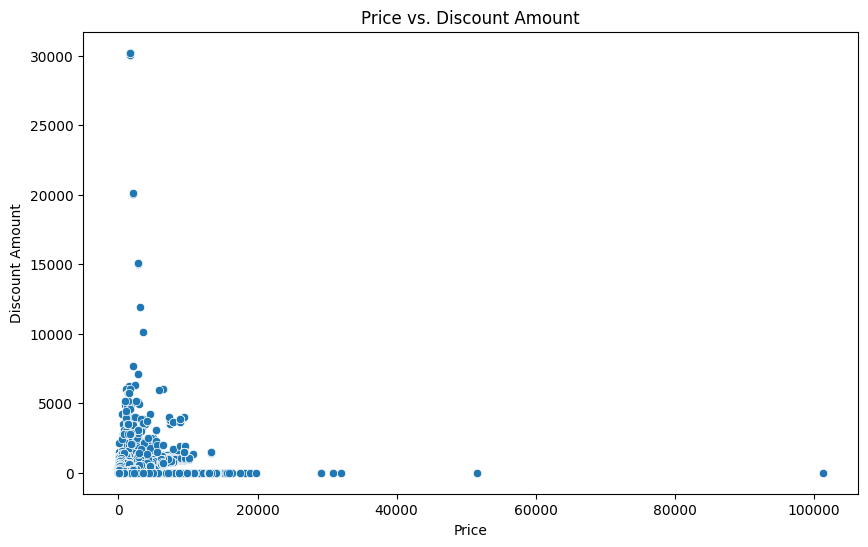

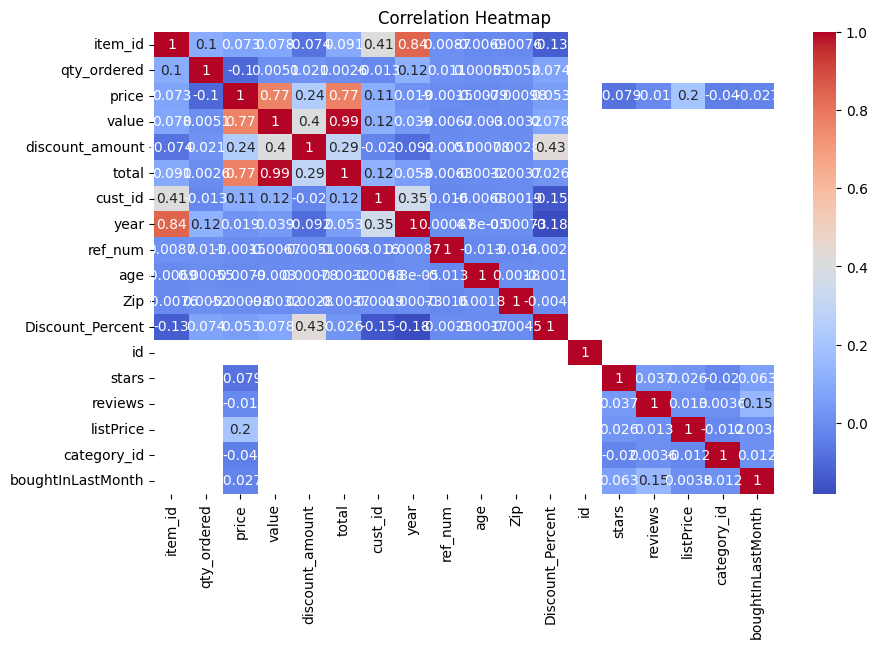

Region
South        104415
Midwest       81299
West          51080
Northeast     50531
Central        2234
North           950
Name: count, dtype: int64


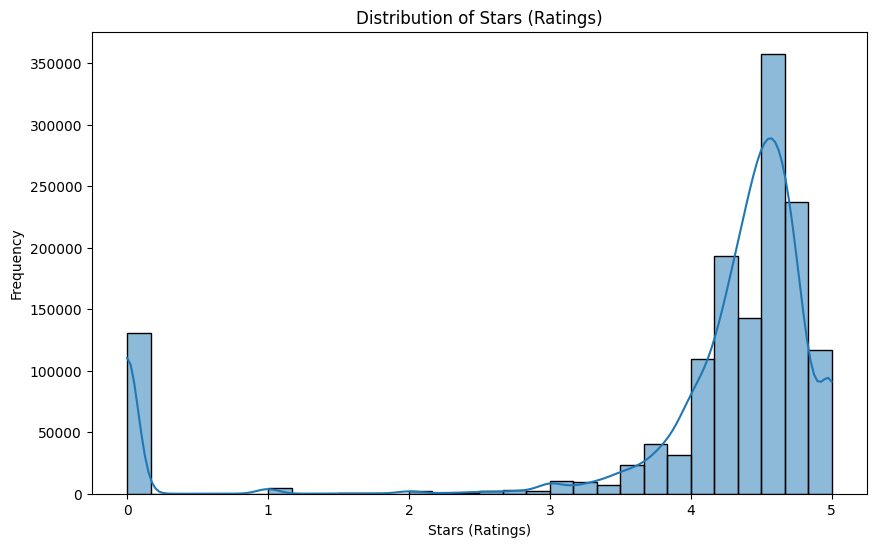

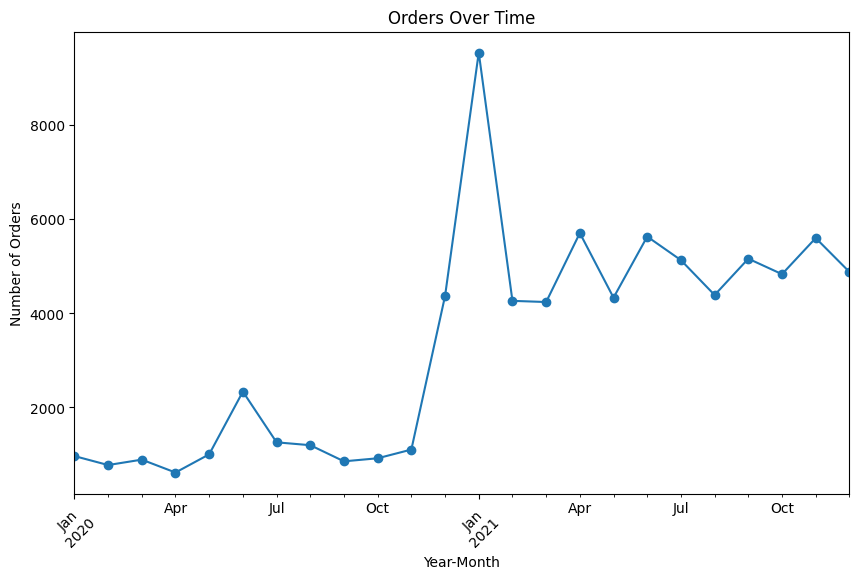

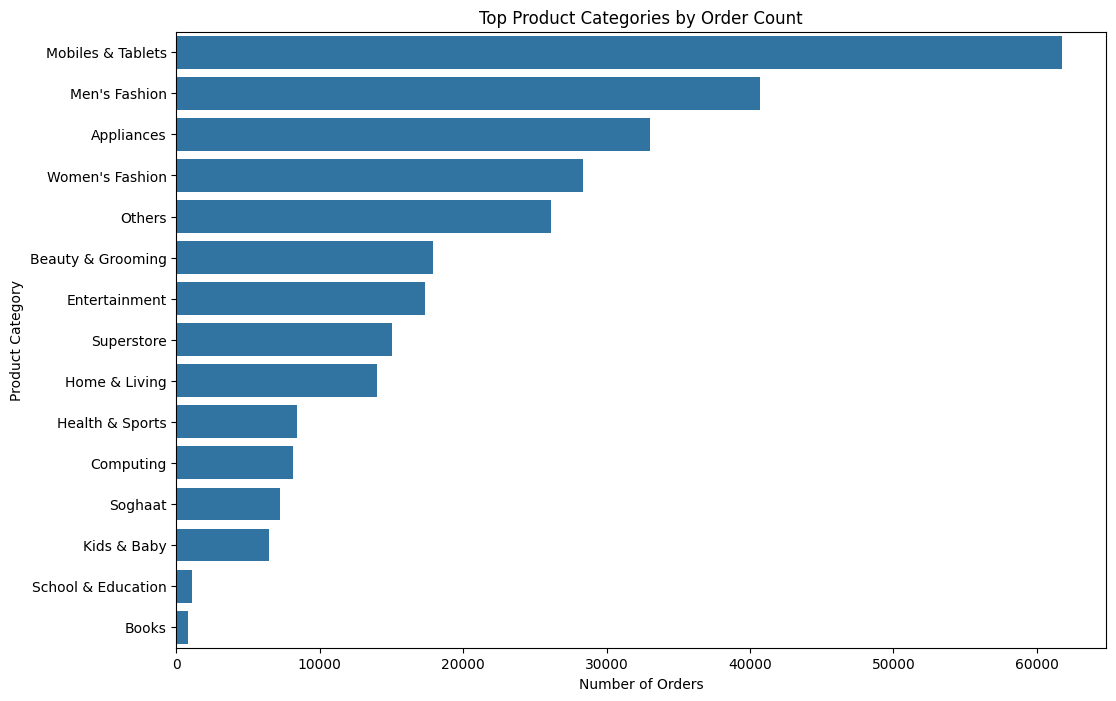

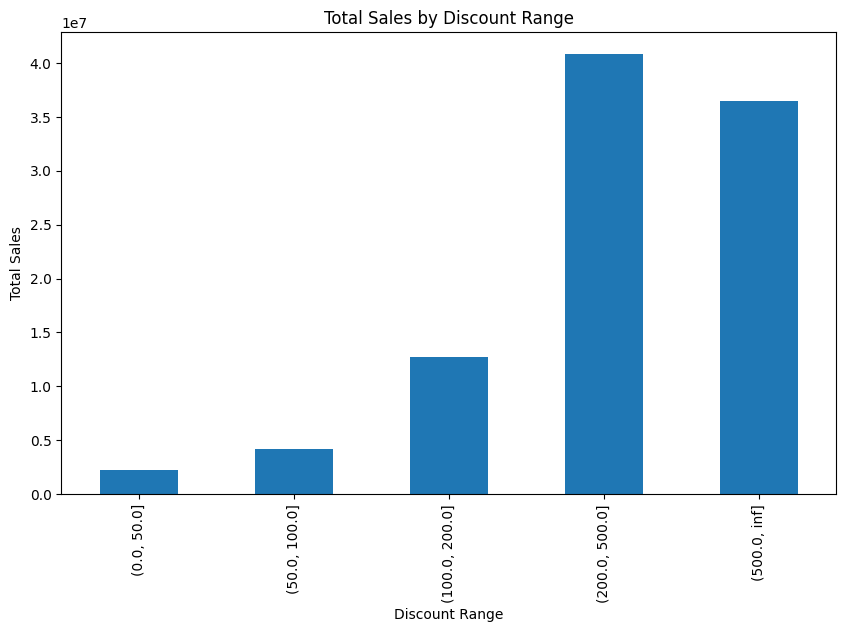

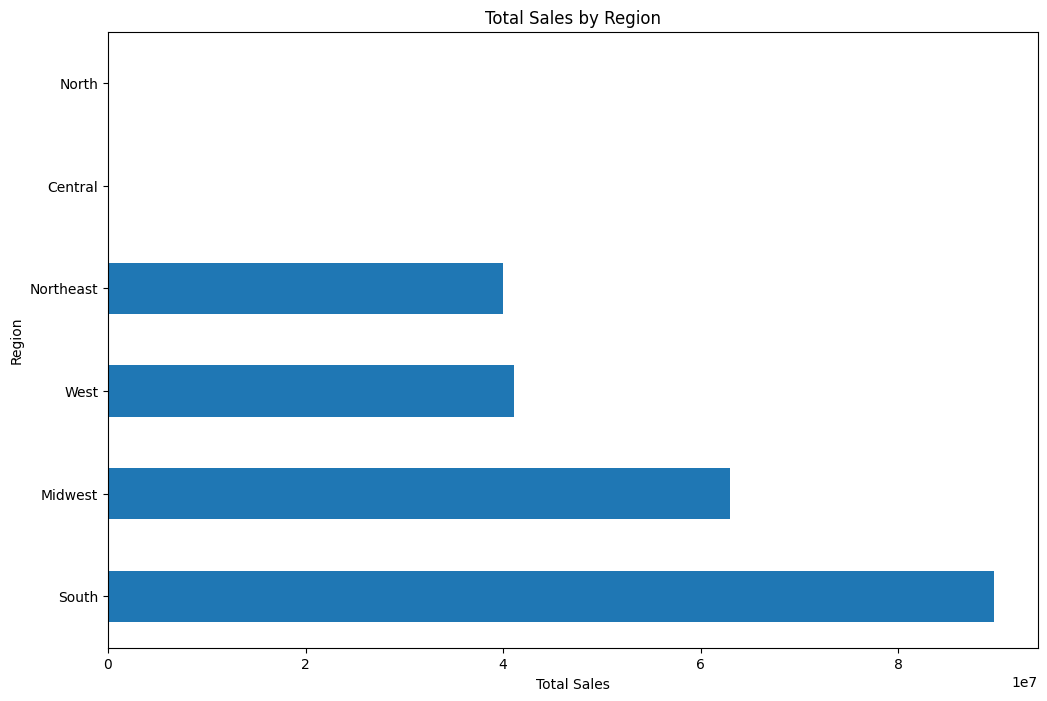

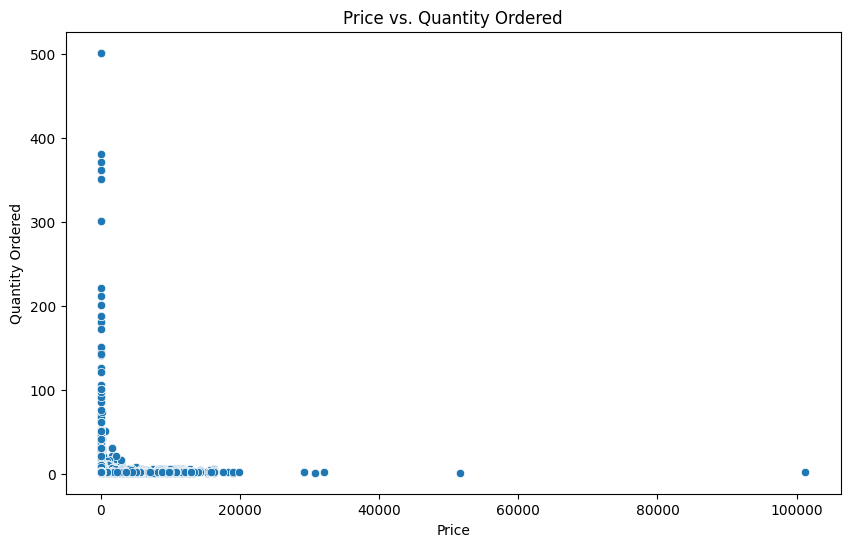

Correlation between Price and Quantity Ordered:
                 price  qty_ordered
price        1.000000    -0.103748
qty_ordered -0.103748     1.000000
Mean Squared Error: 5.392242441820267
R-squared Score: 0.00419563671927059


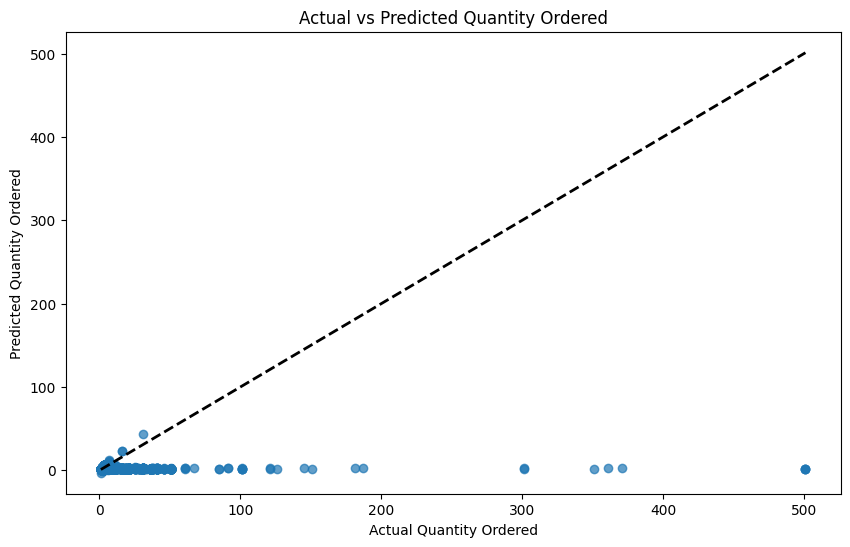

In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Datasets
# File paths (based on extracted zip structure)
product_excel_path = 'DataSetFolder/Amazon product/P1-AmazingMartEU2.xlsx'
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21/Amazon Sales FY2020-21.csv'
product_folder_path = 'DataSetFolder/Amazon Products Dataset'

# Load the Excel and CSV files
product_excel_df = pd.read_excel(product_excel_path)
product_csv_df = pd.read_csv(product_csv_path, low_memory=False)

# Load CSV files from 'Amazon Products Dataset' folder
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]

# Combine all datasets into one DataFrame
combined_df = pd.concat([product_excel_df, product_csv_df] + product_folder_dfs, ignore_index=True)

# Step 3: Basic Data Exploration
print(combined_df.shape)
print(combined_df.head())
print(combined_df.info())

# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])

# Step 4: Clean Price Column (if applicable)
def clean_price_column(column):
    return pd.to_numeric(column.str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Apply cleaning function to the 'price' and 'discount_amount' columns if they exist
# Uncomment if applicable
# combined_df['price'] = clean_price_column(combined_df['price'])
# combined_df['discount_amount'] = clean_price_column(combined_df['discount_amount'])

# Step 5: Data Reduction (drop unnecessary columns)
columns_to_drop = ['order_id', 'user_name', 'Phone No.', 'Sign in date']  # Example of columns to drop
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Step 6: Univariate Analysis - Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count of Orders per Region
plt.figure(figsize=(12, 8))
sns.countplot(y='Region', data=combined_df_cleaned, order=combined_df_cleaned['Region'].value_counts().index)
plt.title('Count of Orders per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Step 8: Outlier Detection for Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()

# Step 9: Average Price per Region
avg_price_per_region = combined_df_cleaned.groupby('Region')['price'].mean().sort_values()
avg_price_per_region.plot(kind='barh', figsize=(12, 8))
plt.title('Average Price per Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

# Step 10: Price vs. Discount Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='discount_amount', data=combined_df_cleaned)
plt.title('Price vs. Discount Amount')
plt.xlabel('Price')
plt.ylabel('Discount Amount')
plt.show()

# Step 11: Correlation Heatmap
numeric_cols = combined_df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 12: Value Counts for Categorical Variables (e.g., Region)
print(combined_df_cleaned['Region'].value_counts())

# Step 13: Distribution of Stars (Ratings)
# Assuming the 'stars' column is in one of the product CSV files
stars_df = product_folder_dfs[1]  # Adjust index if necessary
plt.figure(figsize=(10, 6))
sns.histplot(stars_df['stars'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars (Ratings)')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Frequency')
plt.show()

# Additional EDA: Orders Over Time
combined_df['order_date'] = pd.to_datetime(combined_df['order_date'], errors='coerce')
combined_df['year_month'] = combined_df['order_date'].dt.to_period('M')

monthly_orders = combined_df.groupby('year_month').size()
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Orders Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Top Categories by Order Count
category_order_count = combined_df['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_order_count.values, y=category_order_count.index)
plt.title('Top Product Categories by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

# Discount Impact Analysis by Range
discount_bins = pd.cut(combined_df['discount_amount'], bins=[0, 50, 100, 200, 500, np.inf])
discount_sales = combined_df.groupby(discount_bins, observed=False)['total'].sum()

plt.figure(figsize=(10, 6))
discount_sales.plot(kind='bar')
plt.title('Total Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales')
plt.show()

# Customer Segmentation Analysis (Sales by Region)
region_sales = combined_df.groupby('Region')['total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
region_sales.plot(kind='barh')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# Correlation Between Price and Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='qty_ordered', data=combined_df)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.show()

# Correlation Between Price and Quantity Ordered (print correlation)
price_qty_corr = combined_df[['price', 'qty_ordered']].corr()
print("Correlation between Price and Quantity Ordered:\n", price_qty_corr)

# Step 14: Regression Analysis - Linear Regression
# Selecting Features and Target
features = combined_df[['price', 'discount_amount']].copy()  # Adjust columns based on dataset
target = combined_df['qty_ordered'].copy()

# Handle missing values by filling with the median
features.fillna(features.median(), inplace=True)
target.fillna(target.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Quantity Ordered")
plt.ylabel("Predicted Quantity Ordered")
plt.title("Actual vs Predicted Quantity Ordered")
plt.show()


In [27]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Datasets
# File paths (based on extracted zip structure)
product_excel_path = 'DataSetFolder/Amazon product/P1-AmazingMartEU2.xlsx'
product_csv_path = 'DataSetFolder/Amazon Sales FY2020-21/Amazon Sales FY2020-21.csv'
product_folder_path = 'DataSetFolder/Amazon Products Dataset'

# Load the Excel and CSV files
product_excel_df = pd.read_excel(product_excel_path)
product_csv_df = pd.read_csv(product_csv_path, low_memory=False)

# Load CSV files from 'Amazon Products Dataset' folder
csv_files = [f for f in os.listdir(product_folder_path) if f.endswith('.csv')]
product_folder_dfs = [pd.read_csv(os.path.join(product_folder_path, f)) for f in csv_files]

# Combine all datasets into one DataFrame
combined_df = pd.concat([product_excel_df, product_csv_df] + product_folder_dfs, ignore_index=True)


In [29]:
# Step 3: Basic Data Exploration
print(combined_df.shape)
print(combined_df.head())
print(combined_df.info())


(1717094, 54)
          Order ID Order Date     Customer Name        City         Country  \
0  BN-2011-7407039 2011-01-01        Ruby Patel   Stockholm          Sweden   
1  AZ-2011-9050313 2011-01-03    Summer Hayward   Southport  United Kingdom   
2  AZ-2011-6674300 2011-01-04  Devin Huddleston     Valence          France   
3  BN-2011-2819714 2011-01-04       Mary Parker  Birmingham  United Kingdom   
4   AZ-2011-617423 2011-01-05      Daniel Burke  Echirolles          France   

    Region      Segment  Ship Date     Ship Mode                 State  ...  \
0    North  Home Office 2011-01-05  Economy Plus             Stockholm  ...   
1    North     Consumer 2011-01-07       Economy               England  ...   
2  Central     Consumer 2011-01-08       Economy  Auvergne-Rhône-Alpes  ...   
3    North    Corporate 2011-01-09       Economy               England  ...   
4  Central  Home Office 2011-01-07      Priority  Auvergne-Rhône-Alpes  ...   

  asin title imgUrl  productURL star

In [31]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])


Order ID             1712977
Order Date           1712977
Customer Name        1712977
City                 1426585
Country              1712977
Region               1426585
Segment              1712977
Ship Date            1712977
Ship Mode            1712977
State                1426585
order_id             1430702
order_date           1430702
status               1430702
item_id              1430702
sku                  1430702
qty_ordered          1430702
price                   4365
value                1430702
discount_amount      1430702
total                1430702
category             1430702
payment_method       1430702
bi_st                1430702
cust_id              1430702
year                 1430702
month                1430702
ref_num              1430702
Name Prefix          1430702
First Name           1430702
Middle Initial       1430702
Last Name            1430702
Gender               1430702
age                  1430702
full_name            1430702
E Mail        

In [33]:
# Step 4: Clean Price Column (if applicable)
def clean_price_column(column):
    return pd.to_numeric(column.str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Apply cleaning function to the 'price' and 'discount_amount' columns if they exist
# Uncomment if applicable
# combined_df['price'] = clean_price_column(combined_df['price'])
# combined_df['discount_amount'] = clean_price_column(combined_df['discount_amount'])


In [35]:
# Step 5: Data Reduction (drop unnecessary columns)
columns_to_drop = ['order_id', 'user_name', 'Phone No.', 'Sign in date']  # Example of columns to drop
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')


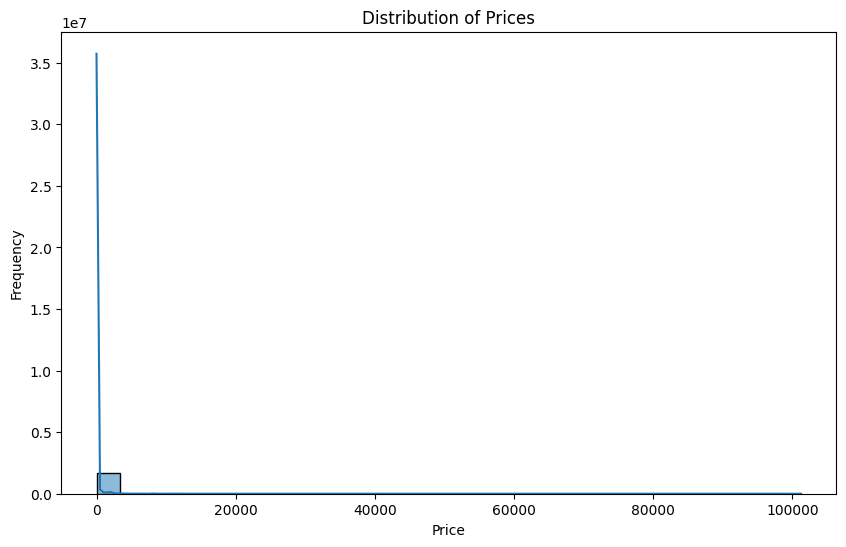

In [37]:
# Step 6: Univariate Analysis - Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


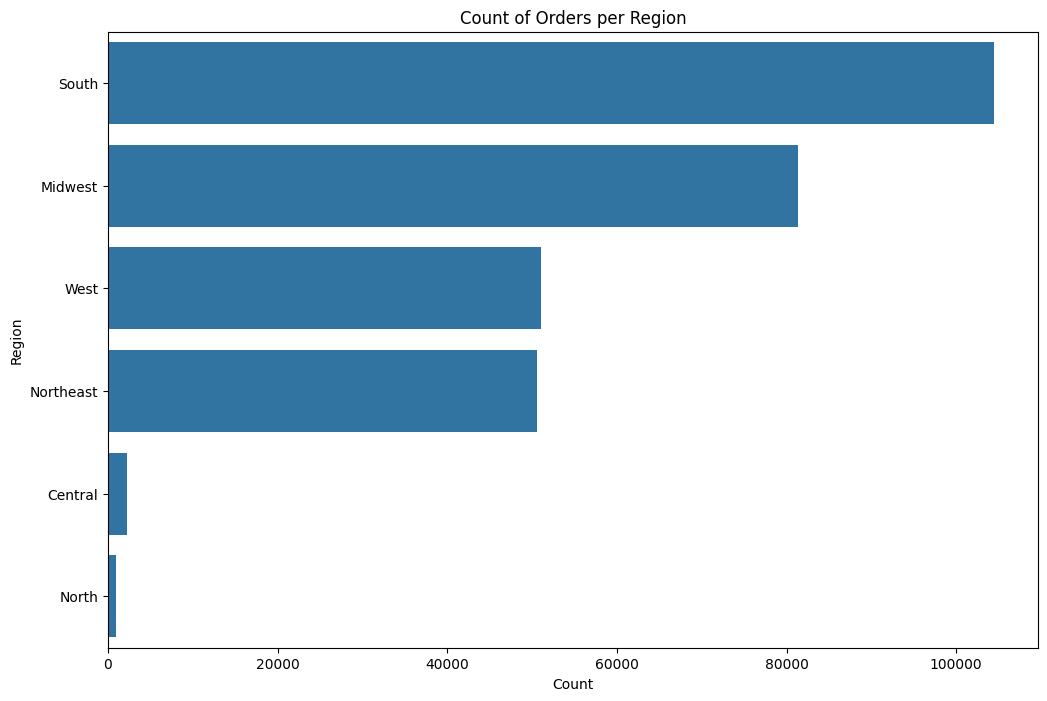

In [39]:
# Step 7: Count of Orders per Region
plt.figure(figsize=(12, 8))
sns.countplot(y='Region', data=combined_df_cleaned, order=combined_df_cleaned['Region'].value_counts().index)
plt.title('Count of Orders per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


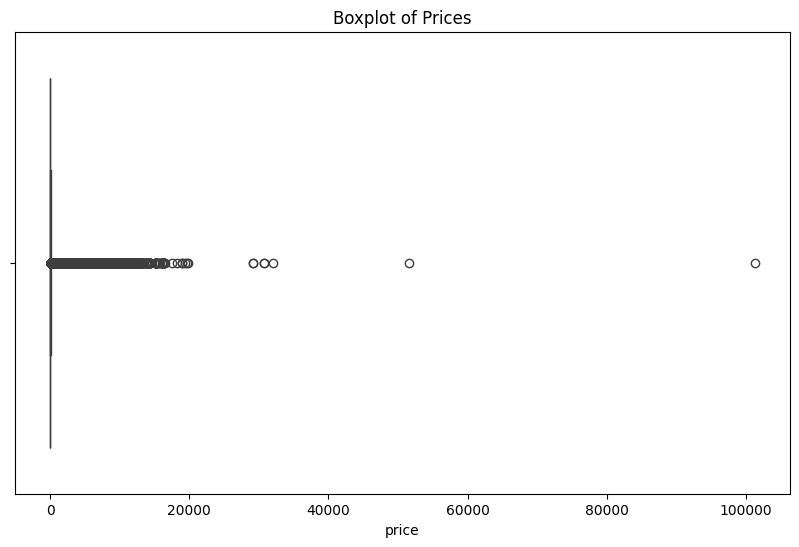

In [41]:
# Step 8: Outlier Detection for Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()


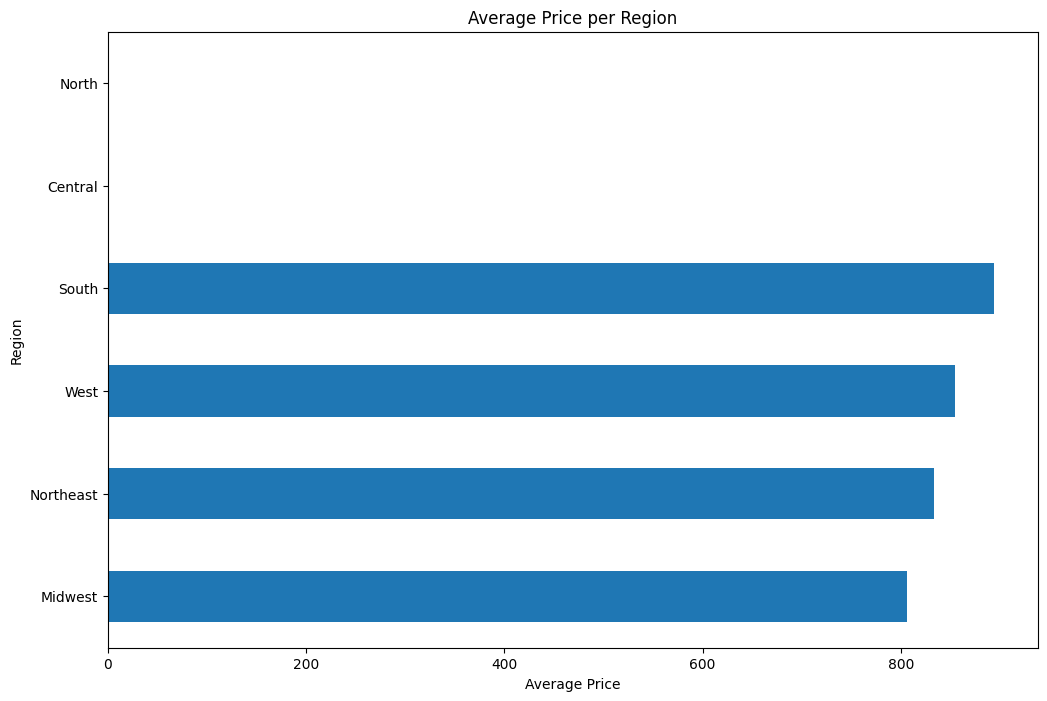

In [43]:
# Step 9: Average Price per Region
avg_price_per_region = combined_df_cleaned.groupby('Region')['price'].mean().sort_values()
avg_price_per_region.plot(kind='barh', figsize=(12, 8))
plt.title('Average Price per Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()


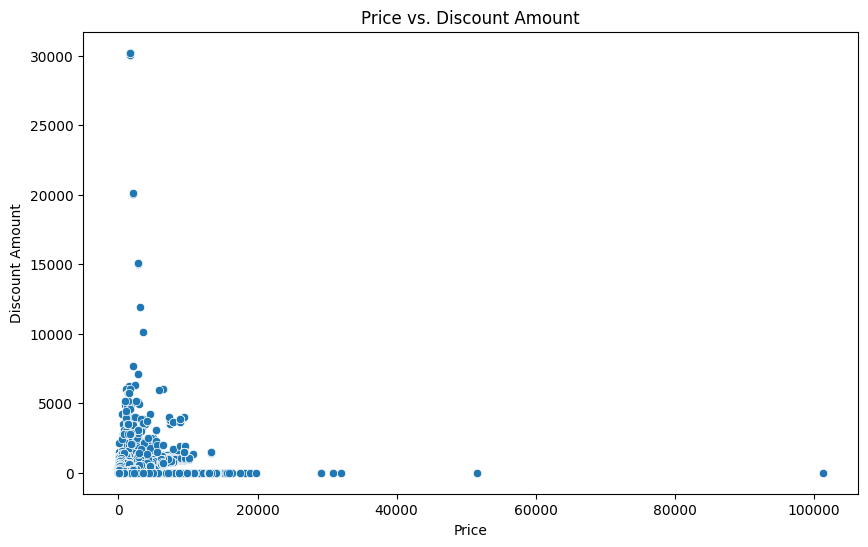

In [45]:
# Step 10: Price vs. Discount Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='discount_amount', data=combined_df_cleaned)
plt.title('Price vs. Discount Amount')
plt.xlabel('Price')
plt.ylabel('Discount Amount')
plt.show()


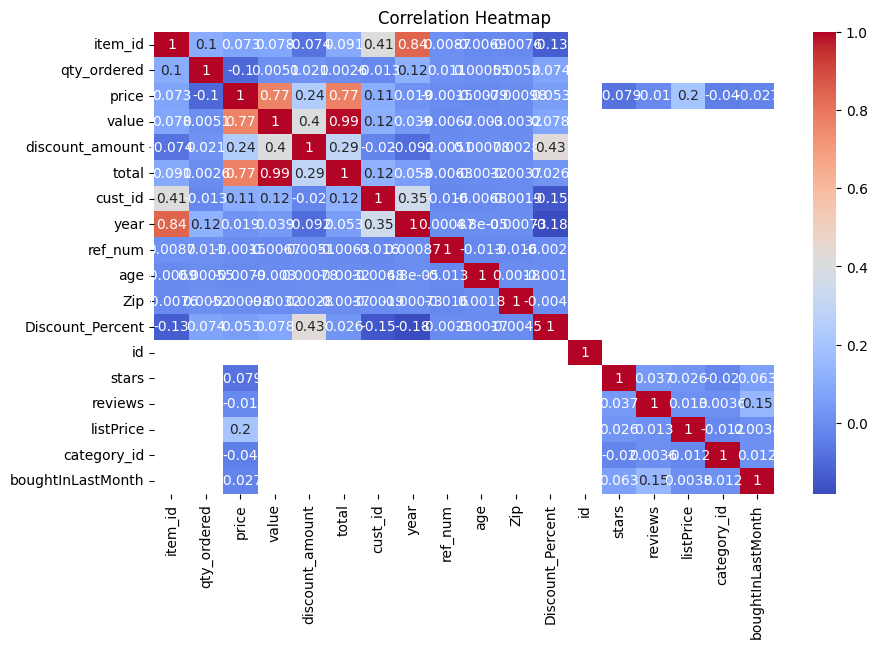

In [47]:
# Step 11: Correlation Heatmap
numeric_cols = combined_df_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [49]:
# Step 12: Value Counts for Categorical Variables (e.g., Region)
print(combined_df_cleaned['Region'].value_counts())


Region
South        104415
Midwest       81299
West          51080
Northeast     50531
Central        2234
North           950
Name: count, dtype: int64


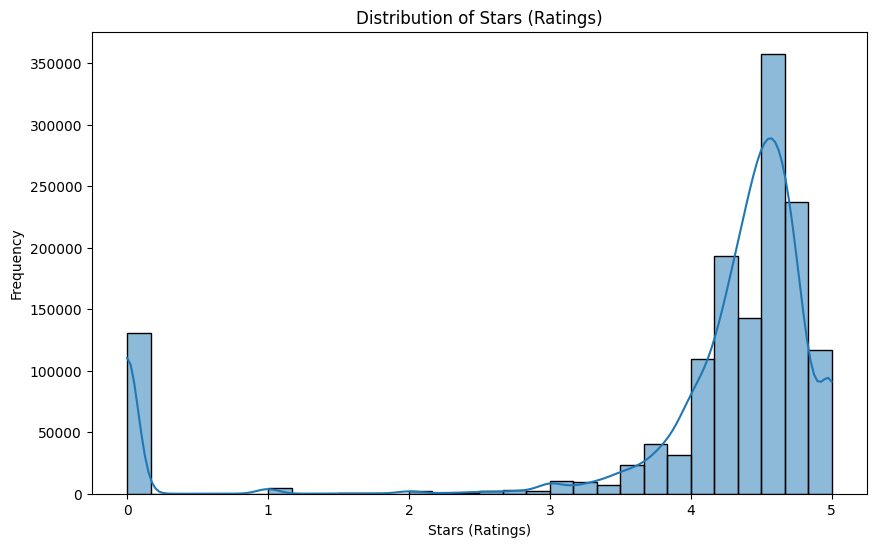

In [51]:
# Step 13: Distribution of Stars (Ratings)
plt.figure(figsize=(10, 6))
sns.histplot(stars_df['stars'].dropna(), bins=30, kde=True)
plt.title('Distribution of Stars (Ratings)')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Frequency')
plt.show()


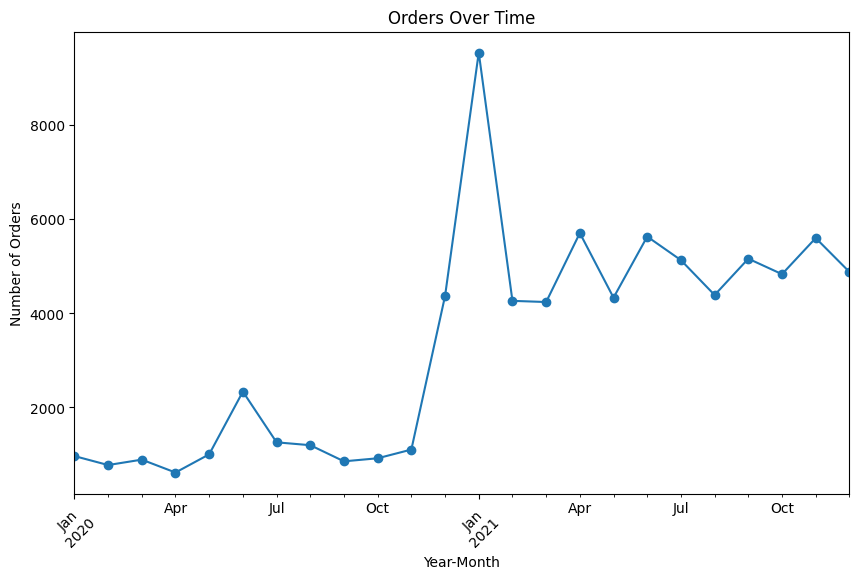

In [53]:
# Additional EDA: Orders Over Time
combined_df['order_date'] = pd.to_datetime(combined_df['order_date'], errors='coerce')
combined_df['year_month'] = combined_df['order_date'].dt.to_period('M')

monthly_orders = combined_df.groupby('year_month').size()
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Orders Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


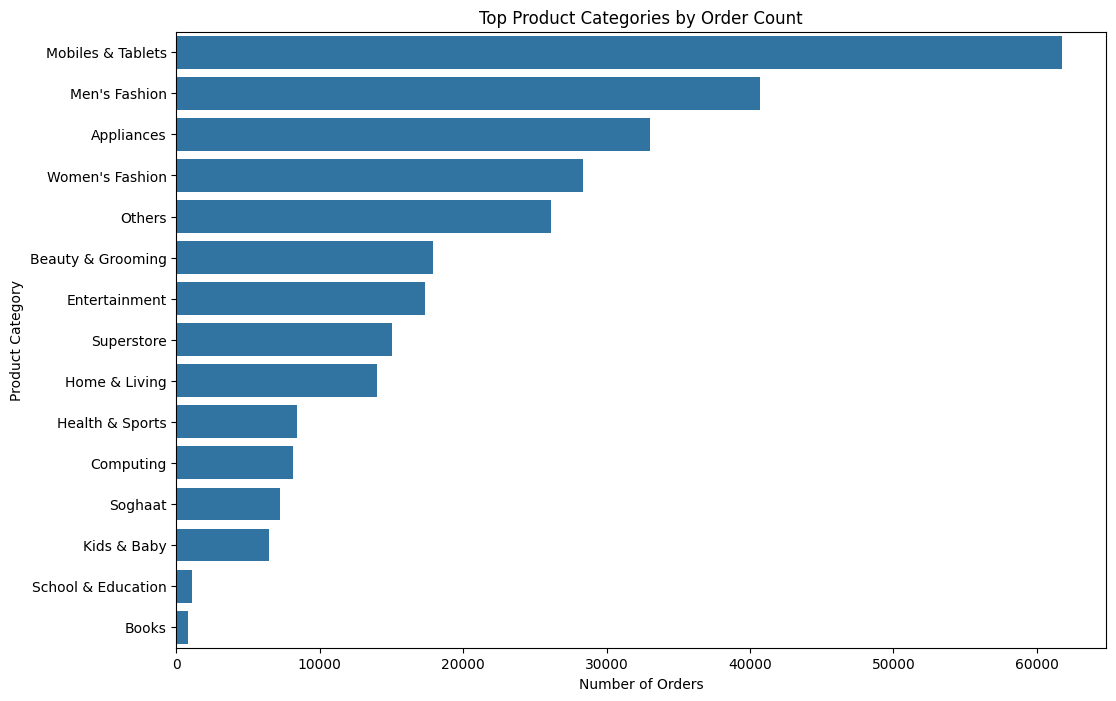

In [55]:
# Top Categories by Order Count
category_order_count = combined_df['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_order_count.values, y=category_order_count.index)
plt.title('Top Product Categories by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()


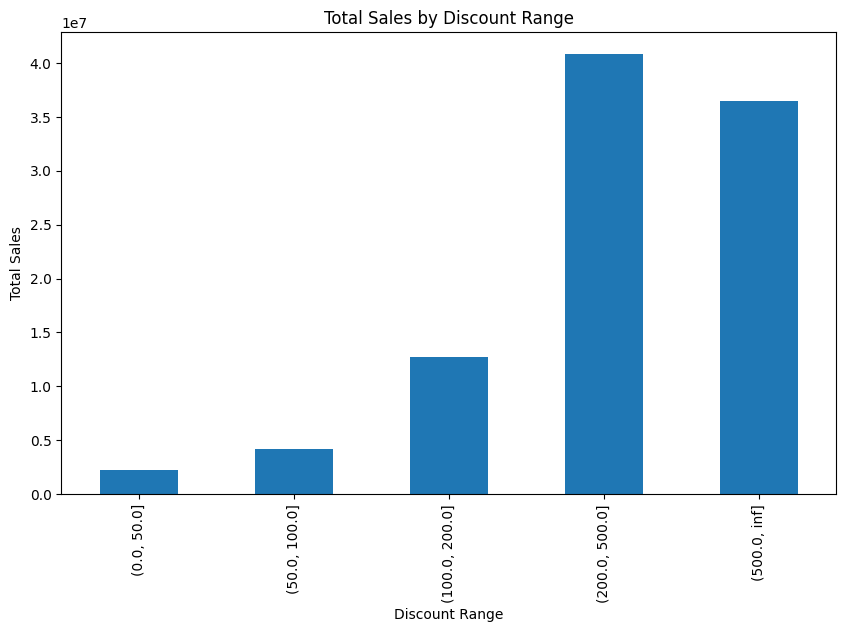

In [57]:
# Discount Impact Analysis by Range
discount_bins = pd.cut(combined_df['discount_amount'], bins=[0, 50, 100, 200, 500, np.inf])
discount_sales = combined_df.groupby(discount_bins, observed=False)['total'].sum()

plt.figure(figsize=(10, 6))
discount_sales.plot(kind='bar')
plt.title('Total Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Sales')
plt.show()


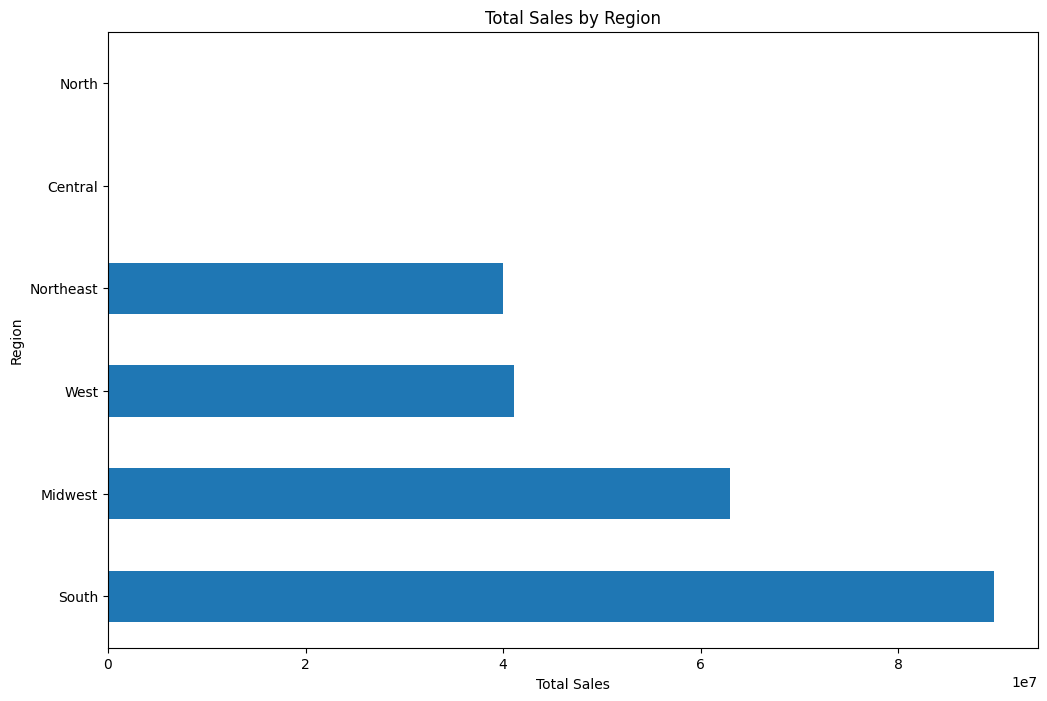

In [59]:
# Customer Segmentation Analysis (Sales by Region)
region_sales = combined_df.groupby('Region')['total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
region_sales.plot(kind='barh')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


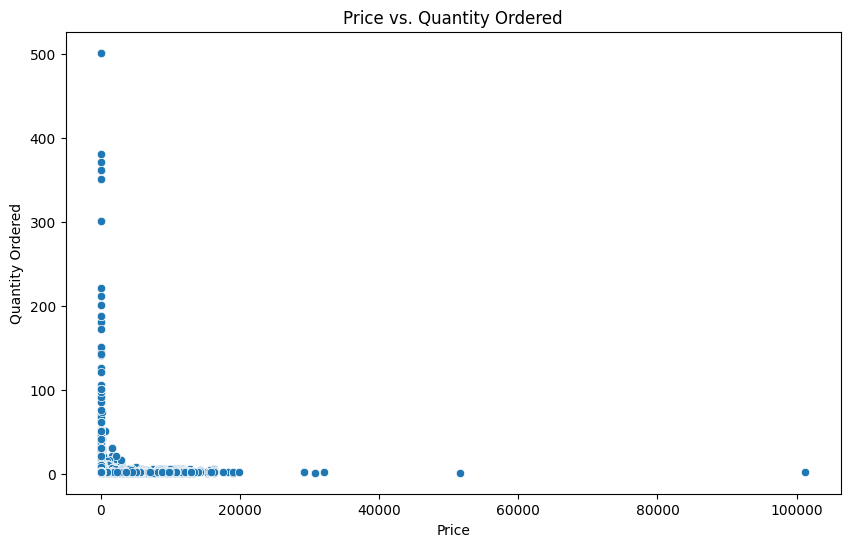

Correlation between Price and Quantity Ordered:
                 price  qty_ordered
price        1.000000    -0.103748
qty_ordered -0.103748     1.000000


In [62]:
# Correlation Between Price and Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='qty_ordered', data=combined_df)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.show()

# Correlation Between Price and Quantity Ordered (print correlation)
price_qty_corr = combined_df[['price', 'qty_ordered']].corr()
print("Correlation between Price and Quantity Ordered:\n", price_qty_corr)


In [64]:
# Step 14: Regression Analysis - Linear Regression
# Selecting Features and Target
features = combined_df[['price', 'discount_amount']].copy()  # Adjust columns based on dataset
target = combined_df['qty_ordered'].copy()

# Handle missing values by
